In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
import seaborn as sns
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import time

In [4]:
df=pd.read_csv(r"C:\Users\rambr\OneDrive\Desktop\Cleaned_mobiles.csv")

In [5]:
df

,Rating,Price,Original_Price,Discount,Page,Brand,Model,number_of_ratings,number_of_reviews,RAM,Internal_storage
0,4.4,39999,49999,20%,1,Google,Pixel 9A,4870,334,8,256
1,4.4,39999,49999,20%,1,Google,Pixel 9A,4870,334,8,256
2,4.1,7499,9999,25%,1,POCO,128 GB,30602,1450,6,128
3,4.3,6999,9999,30%,1,Samsung,Galaxy F07,2647,136,4,64
4,4.4,39999,49999,20%,1,Google,Pixel 9A,4870,334,8,256
...,...,...,...,...,...,...,...,...,...,...,...
955,4.3,24000,27499,12%,41,Samsung,Galaxy M35,5761,363,8,256
956,4.2,18749,28499,34%,41,Samsung,Galaxy A25,410,19,8,128
957,4.3,19499,21999,11%,41,Samsung,Galaxy A17,261,12,6,128
958,4.3,23490,28999,18%,41,REDMI,Note-14,525,24,8,128


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             960 non-null    float64
 1   Price              960 non-null    int64  
 2   Original_Price     960 non-null    int64  
 3   Discount           960 non-null    object 
 4   Page               960 non-null    int64  
 5   Brand              960 non-null    object 
 6   Model              960 non-null    object 
 7   number_of_ratings  960 non-null    int64  
 8   number_of_reviews  960 non-null    int64  
 9   RAM                960 non-null    int64  
 10  Internal_storage   960 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 82.6+ KB


In [7]:
# “This dataset contains information about mobile phones including pricing, ratings, specifications, and brand-related attributes. Before analysis, we checked data types to decide which visualizations suit each column.”

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)



Numeric Columns: Index(['Rating', 'Price', 'Original_Price', 'Page', 'number_of_ratings',
       'number_of_reviews', 'RAM', 'Internal_storage'],
      dtype='object')
Categorical Columns: Index(['Discount', 'Brand', 'Model'], dtype='object')


In [9]:
# “We split columns into numeric and categorical because numbers tell distributions, while categories tell counts and dominance.”

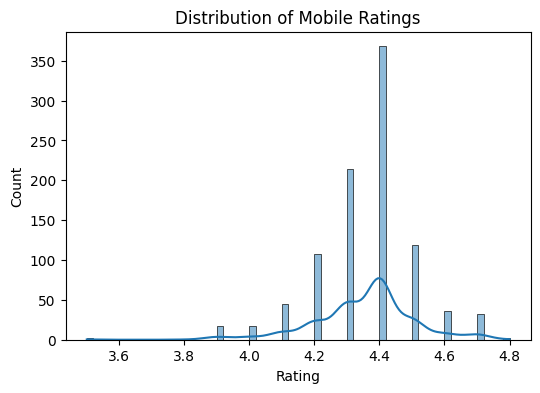

In [54]:

# 1️⃣ Rating – Univariate Analysis
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], kde=True)
plt.title("Distribution of Mobile Ratings")
plt.show()


In [16]:
# “Most mobiles receive ratings above average, indicating generally positive customer satisfaction. Very few low-rated phones exist, which appear as outliers.”

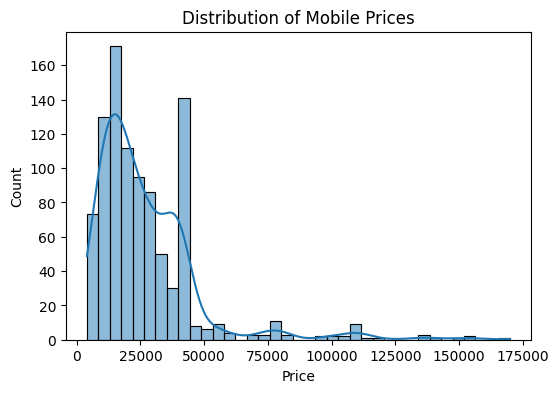

In [22]:
#  2️⃣ Price – Univariate Analysis

plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Mobile Prices")
plt.show()


In [18]:
# “Prices are right-skewed, meaning most phones are budget to mid-range, while a few premium phones increase the maximum price.”

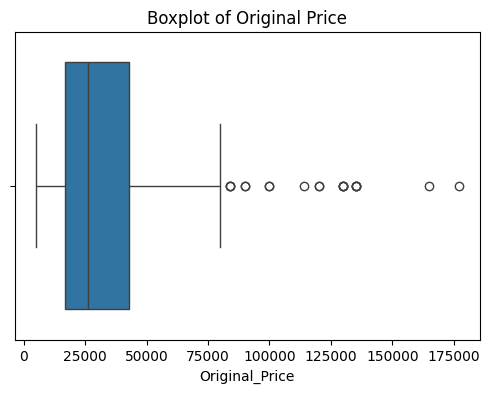

In [23]:
# 3️⃣ Original_Price – Univariate Analysis

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Original_Price'])
plt.title("Boxplot of Original Price")
plt.show()


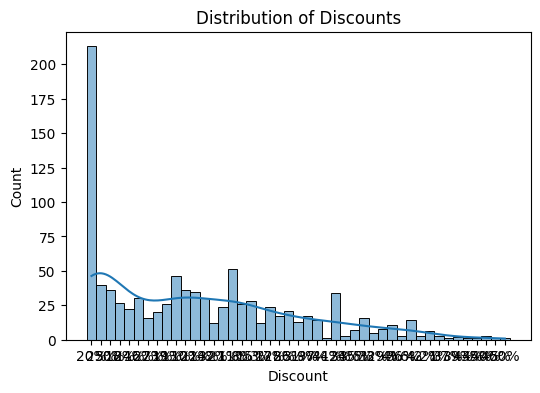

In [24]:
# 4️⃣ Discount

plt.figure(figsize=(6,4))
sns.histplot(df['Discount'], kde=True)
plt.title("Distribution of Discounts")
plt.show()


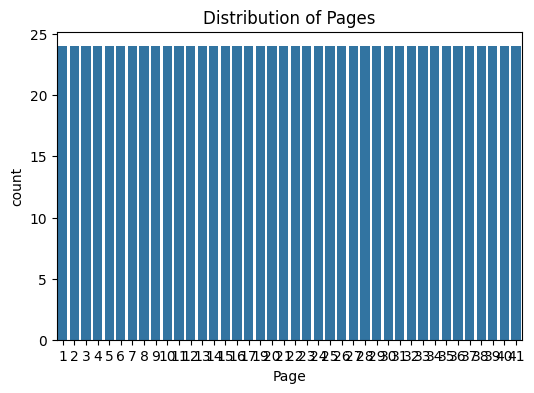

In [25]:
# 5️⃣ Page

plt.figure(figsize=(6,4))
sns.countplot(x=df['Page'])
plt.title("Distribution of Pages")
plt.show()


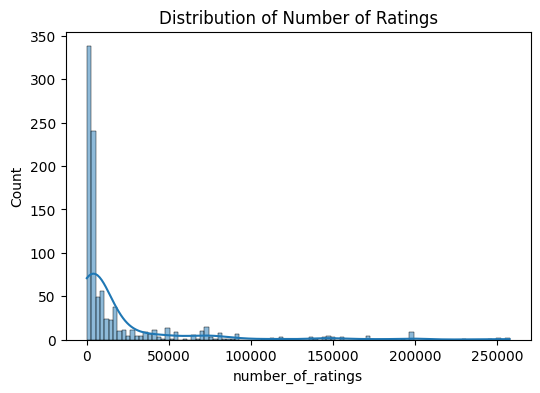

In [26]:
#  6️⃣ number_of_ratings

plt.figure(figsize=(6,4))
sns.histplot(df['number_of_ratings'], kde=True)
plt.title("Distribution of Number of Ratings")
plt.show()


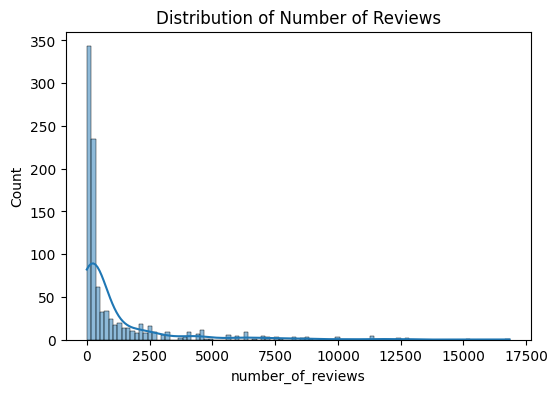

In [27]:
#  7️⃣ number_of_reviews

plt.figure(figsize=(6,4))
sns.histplot(df['number_of_reviews'], kde=True)
plt.title("Distribution of Number of Reviews")
plt.show()


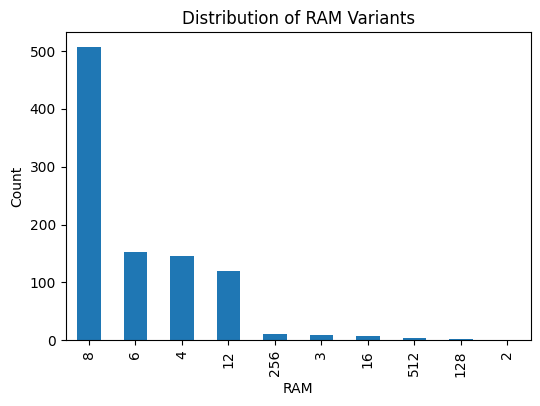

In [28]:
# 8️⃣ RAM

plt.figure(figsize=(6,4))
df['RAM'].value_counts().plot(kind='bar')
plt.title("Distribution of RAM Variants")
plt.xlabel("RAM")
plt.ylabel("Count")
plt.show()


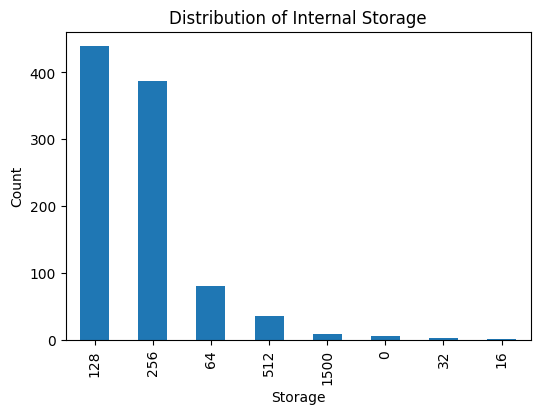

In [29]:
# 9️⃣ Internal_storage

plt.figure(figsize=(6,4))
df['Internal_storage'].value_counts().plot(kind='bar')
plt.title("Distribution of Internal Storage")
plt.xlabel("Storage")
plt.ylabel("Count")
plt.show()


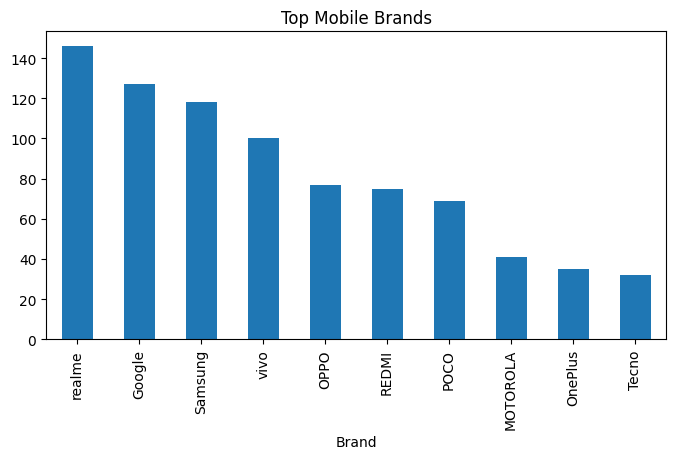

In [30]:
# 🔠 CATEGORICAL COLUMNS — UNIVARIATE ANALYSIS
# 🔟 Brand

plt.figure(figsize=(8,4))
df['Brand'].value_counts().head(10).plot(kind='bar')
plt.title("Top Mobile Brands")
plt.show()


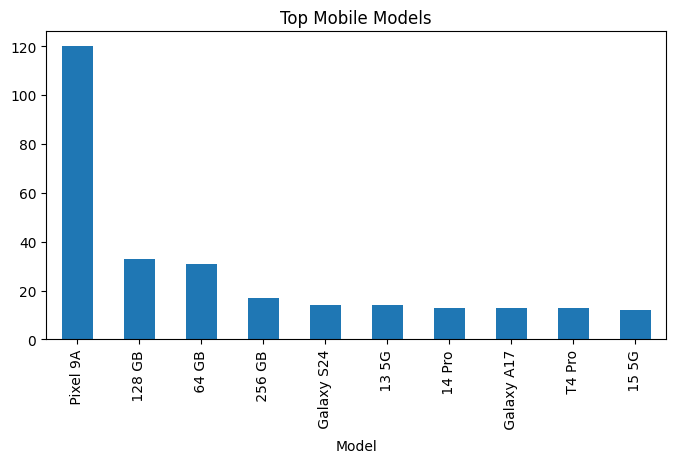

In [31]:
# 1️⃣1️⃣ Model

plt.figure(figsize=(8,4))
df['Model'].value_counts().head(10).plot(kind='bar')
plt.title("Top Mobile Models")
plt.show()


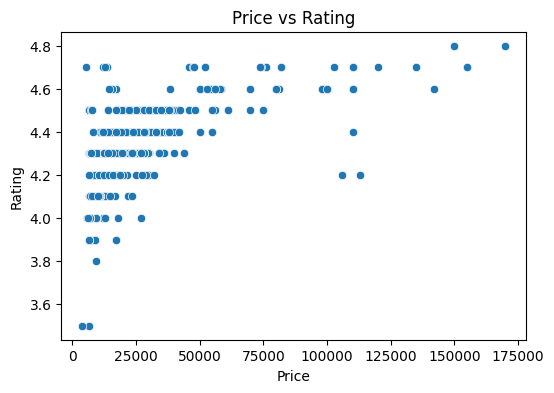

In [32]:
# 🔢 1️⃣ NUMERIC vs NUMERIC (Relationship Analysis)
# Price vs Rating

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Price'], y=df['Rating'])
plt.title("Price vs Rating")
plt.show()


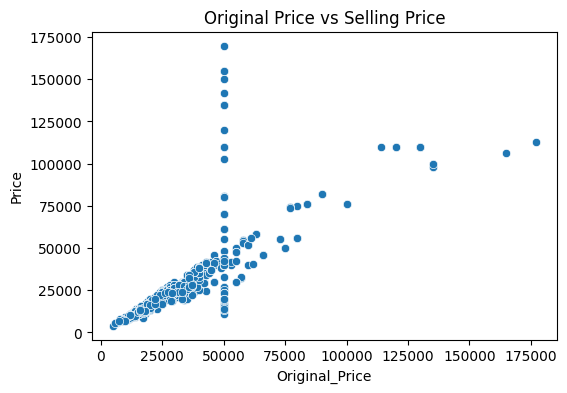

In [33]:
# Price vs Discount
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Original_Price'], y=df['Price'])
plt.title("Original Price vs Selling Price")
plt.show()


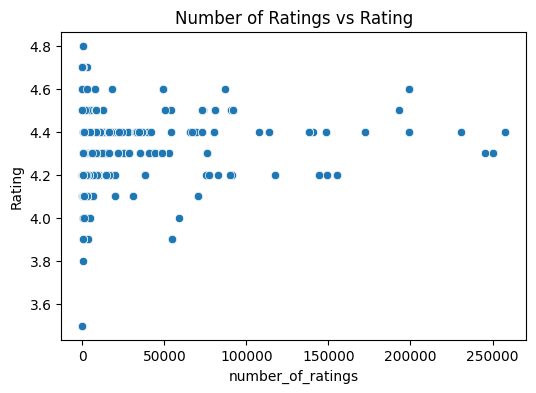

In [34]:
# Number of Ratings vs Rating

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['number_of_ratings'], y=df['Rating'])
plt.title("Number of Ratings vs Rating")
plt.show()


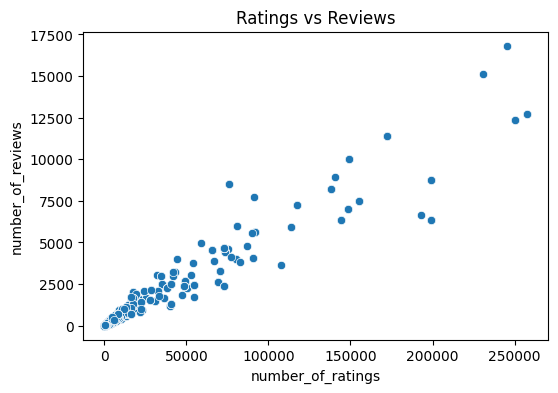

In [35]:
# Number of Ratings vs Number of Reviews

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['number_of_ratings'], y=df['number_of_reviews'])
plt.title("Ratings vs Reviews")
plt.show()


<Figure size 800x400 with 0 Axes>

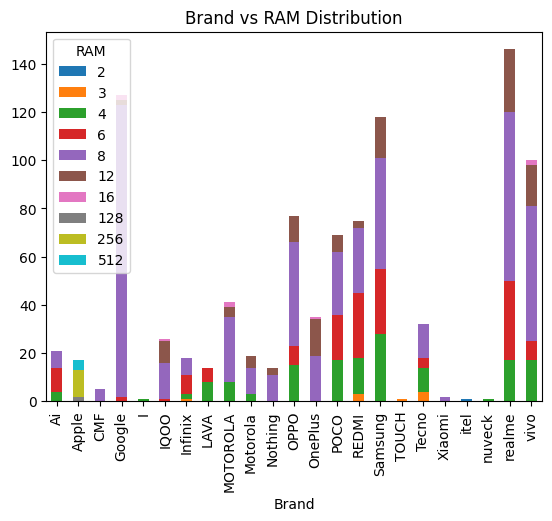

In [36]:
# 🔠 2️⃣ CATEGORICAL vs CATEGORICAL
# Brand vs RAM

plt.figure(figsize=(8,4))
pd.crosstab(df['Brand'], df['RAM']).plot(kind='bar', stacked=True)
plt.title("Brand vs RA3M Distribution")
plt.show()


<Figure size 800x400 with 0 Axes>

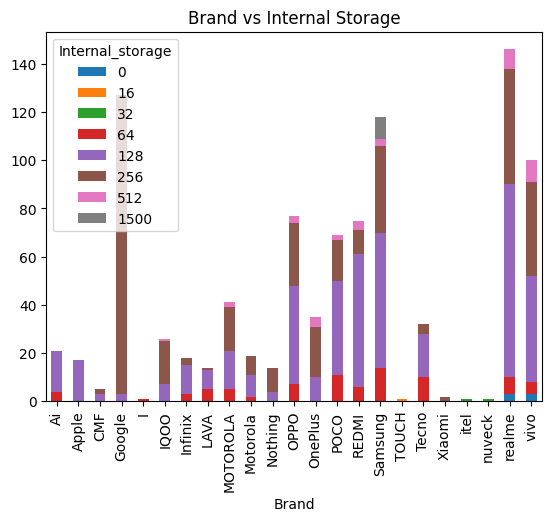

In [37]:
# Brand vs Internal Storage
plt.figure(figsize=(8,4))
pd.crosstab(df['Brand'], df['Internal_storage']).plot(kind='bar', stacked=True)
plt.title("Brand vs Internal Storage")
plt.show()


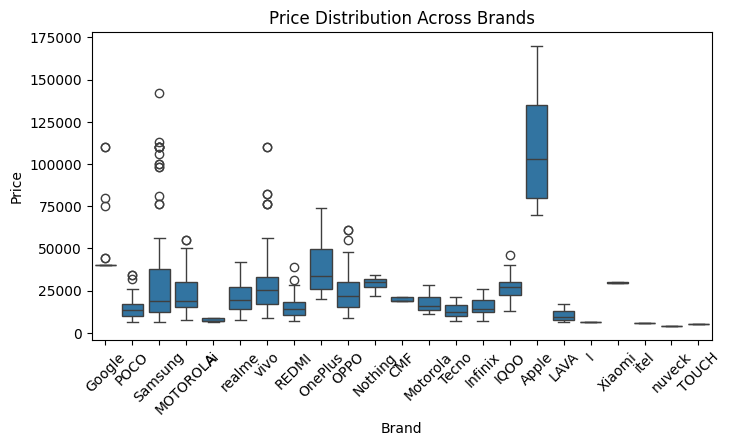

In [55]:
# 🔢🔠 3️⃣ NUMERIC vs CATEGORICAL
# brand vs price
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Brand'], y=df['Price'])
plt.xticks(rotation=45)
plt.title("Price Distribution Across Brands")
plt.show()


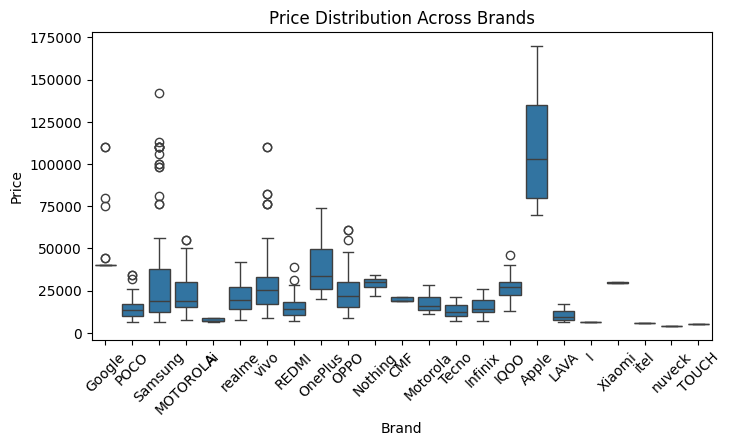

In [39]:
# Price vs Brand

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Brand'], y=df['Price'])
plt.xticks(rotation=45)
plt.title("Price Distribution Across Brands")
plt.show()


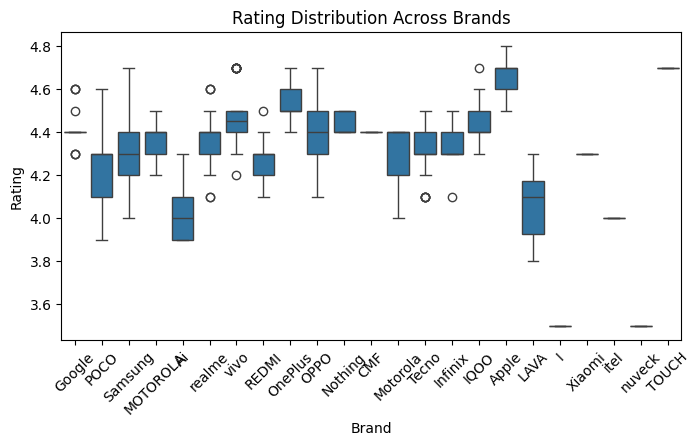

In [40]:
# Rating vs Brand

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Brand'], y=df['Rating'])
plt.xticks(rotation=45)
plt.title("Rating Distribution Across Brands")
plt.show()


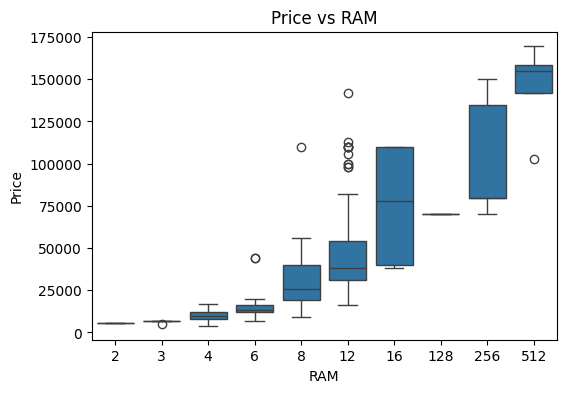

In [42]:
# Price vs RAM
plt.figure(figsize=(6,4))
sns.boxplot(x=df['RAM'], y=df['Price'])
plt.title("Price vs RAM")
plt.show()


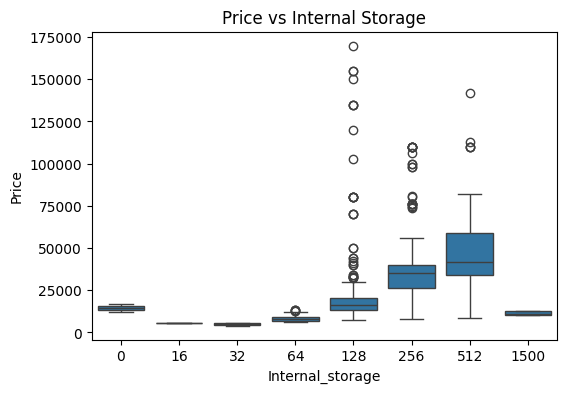

In [43]:
# Price vs Internal Storage 

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Internal_storage'], y=df['Price'])
plt.title("Price vs Internal Storage")
plt.show()


In [45]:
# 🔥 MULTIVARIATE ANALYSIS

plt.figure(figsize=(10,6))

corr = df[['Price',
           'Original_Price',
           'Discount',
           'Rating',
           'number_of_ratings',
           'number_of_reviews']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

ValueError: could not convert string to float: '20%'

<Figure size 1000x600 with 0 Axes>

In [46]:
df['Discount'] = (
    df['Discount']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
)

df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')


In [47]:
df[['Discount']].head()
df['Discount'].dtype


dtype('int64')

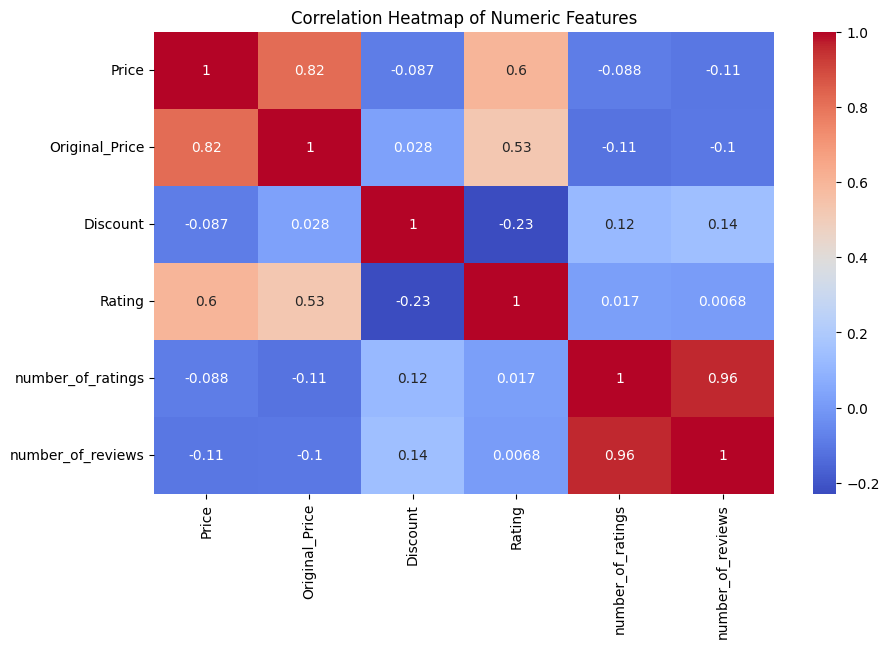

In [48]:
plt.figure(figsize=(10,6))

corr = df[['Price',
           'Original_Price',
           'Discount',
           'Rating',
           'number_of_ratings',
           'number_of_reviews']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


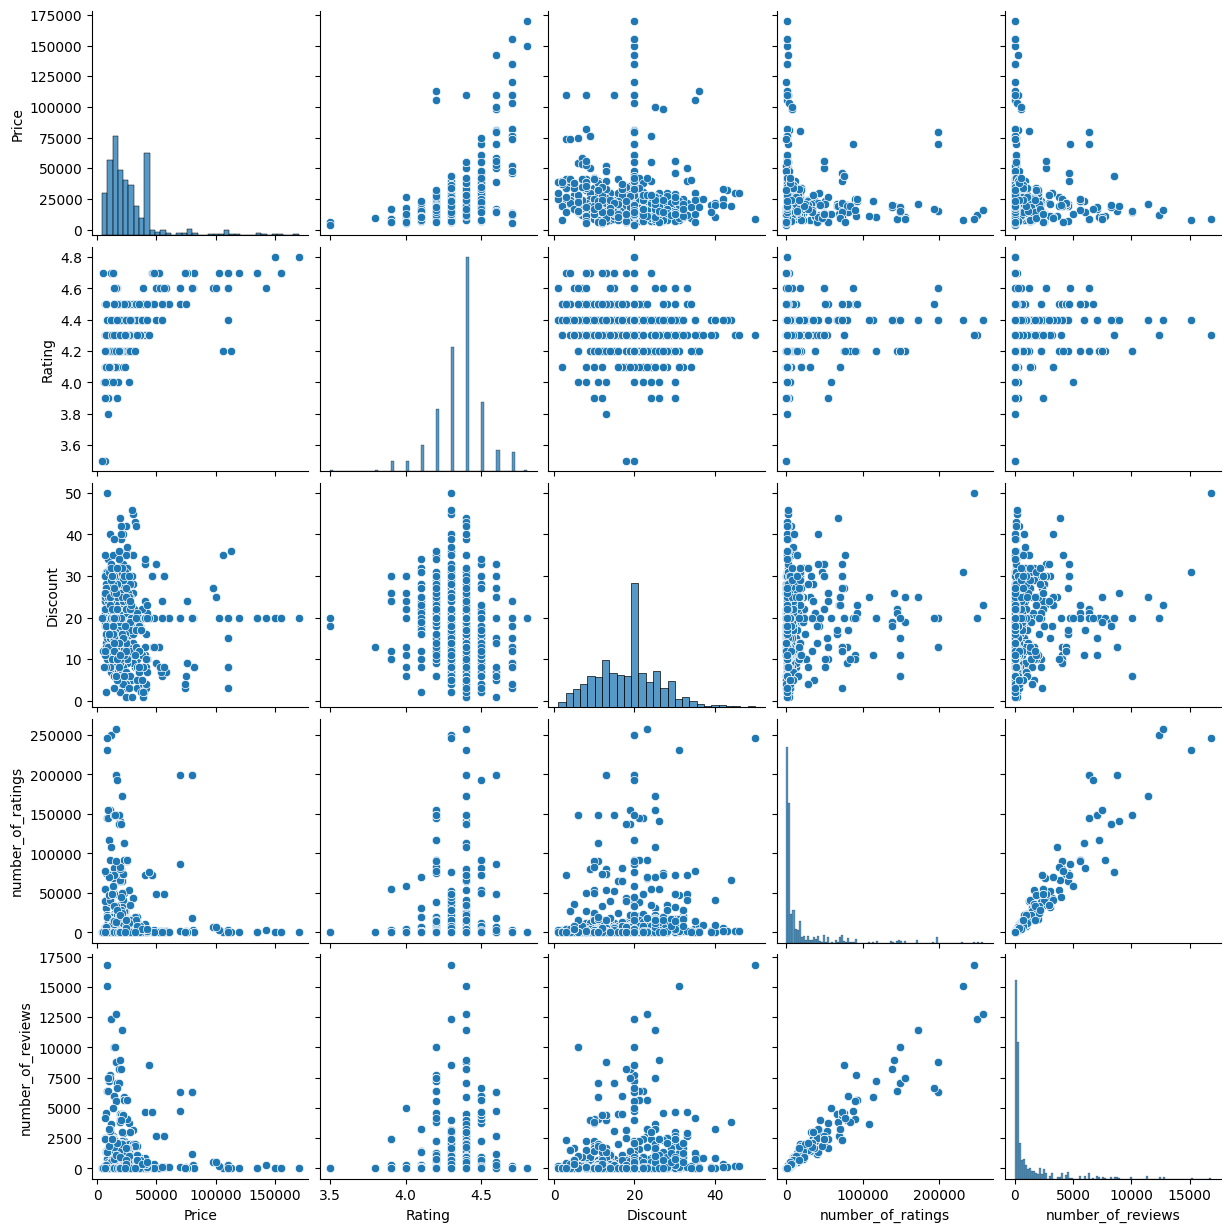

In [49]:
# 2️⃣ Pairplot (Overall Numeric Relationship View)

sns.pairplot(df[['Price','Rating','Discount',
                 'number_of_ratings','number_of_reviews']])
plt.show()


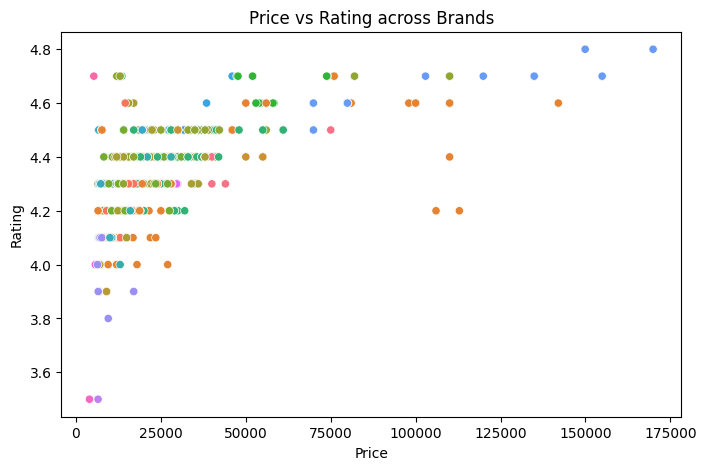

In [50]:
# 3️⃣ Price, Rating & Brand (Numeric + Numeric + Categorical)

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Price',
    y='Rating',
    hue='Brand',
    data=df,
    legend=False
)
plt.title("Price vs Rating across Brands")
plt.show()


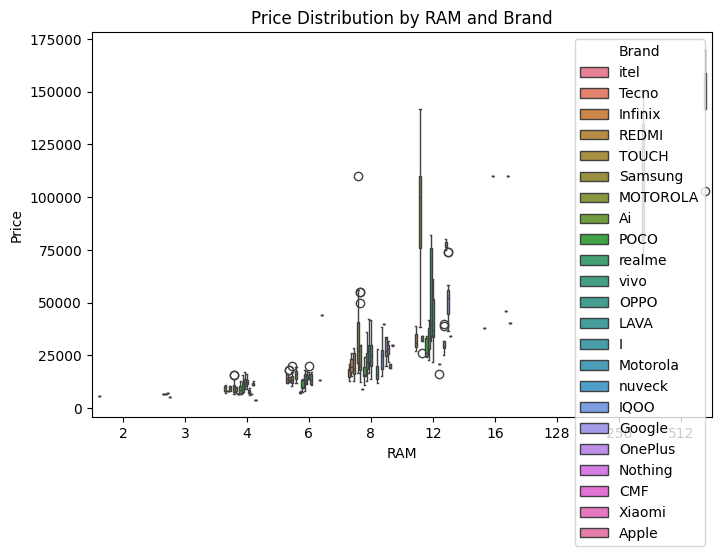

In [51]:
# 4️⃣ Price, RAM & Brand (Numeric + Categorical + Categorical)
plt.figure(figsize=(8,5))
sns.boxplot(
    x='RAM',
    y='Price',
    hue='Brand',
    data=df
)
plt.title("Price Distribution by RAM and Brand")
plt.show()


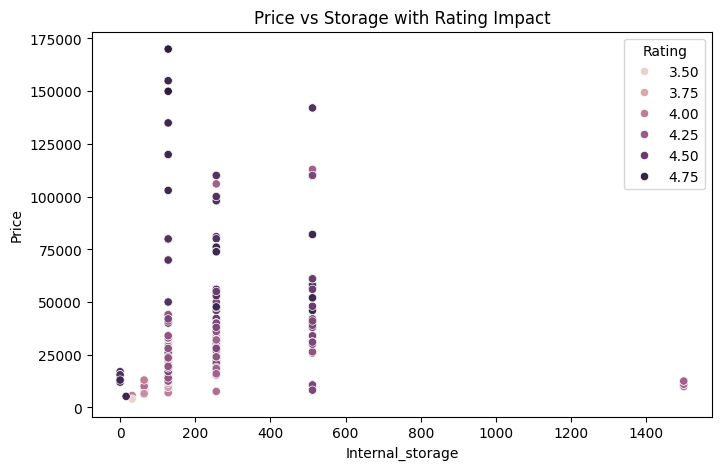

In [52]:
# 5️⃣ Price, Storage & Rating (Numeric + Numeric + Categorical)

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Internal_storage',
    y='Price',
    hue='Rating',
    data=df
)
plt.title("Price vs Storage with Rating Impact")
plt.show()


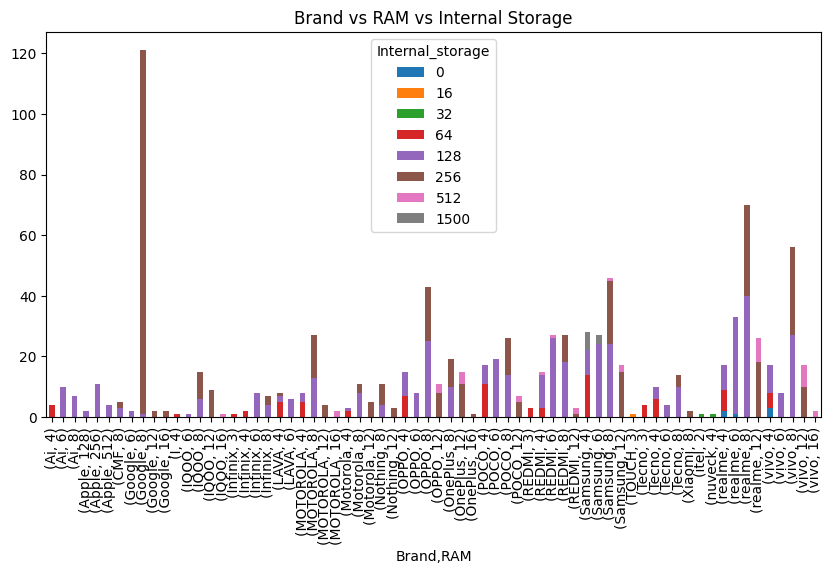

In [53]:
# 6️⃣ Brand, RAM & Storage (Categorical + Categorical + Categorical)

pd.crosstab(
    [df['Brand'], df['RAM']],
    df['Internal_storage']
).plot(kind='bar', stacked=True, figsize=(10,5))

plt.title("Brand vs RAM vs Internal Storage")
plt.show()
